In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import seaborn as sns

In [16]:
plt.rc('font', family='NanumGothic')

In [7]:
df = {}

for i in range(2010, 2022):
    df[i] = pd.read_csv("../data/csv_in_"+ str(i) + ".csv")

C:\Users\science7\AppData\Local\Temp\ipykernel_3304\3123316795.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_"+ str(i) + ".csv")
C:\Users\science7\AppData\Local\Temp\ipykernel_3304\3123316795.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_"+ str(i) + ".csv")
C:\Users\science7\AppData\Local\Temp\ipykernel_3304\3123316795.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_"+ str(i) + ".csv")
C:\Users\science7\AppData\Local\Temp\ipykernel_3304\3123316795.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_"+ str(i) + ".csv")


In [8]:
def get_first_marriage(is_after_covid, gender):
    year_selected = 2020 if is_after_covid == True else 2019
    gender_code = "아내결혼코드" if gender == True else "남편결혼코드"
    first_marriage_condition = df[year_selected][gender_code] == 1

    return df[year_selected][first_marriage_condition]

# 코로나 전/후의 남편/아내가 초혼인 경우의 DataFrame 받아오는 함수
# is_after_covid (bool) : True인 경우 2020년, False인 경우 2019년
# gender (bool) : True인 경우 아내 초혼, False인 경우 남편 초혼

# ex) is_after_covid = False, gender = True => 2020년의 아내 초혼인 경우의 DataFrame 반환

In [9]:
def print_every_year_boxplot(x1, y1):
    for year in range(2010, 2022):
        plt.figure()
        sns.boxplot(x= x1, y=y1, data= df[year])
        plt.title(year)
        plt.show()

In [10]:
get_first_marriage(True, True)['남편결혼코드'].unique()

array([1, 3, 2, 9], dtype=int64)

In [12]:
# 아내 초혼 평균 연령 T검정
scipy.stats.ttest_ind(get_first_marriage(True, True)['아내연령'], get_first_marriage(False, True)['아내연령'], alternative="greater")
# 아내 초혼 연령 : 코로나 이후가 코로나 전보다 커짐

Ttest_indResult(statistic=11.404805606333598, pvalue=2.0050326470635367e-30)

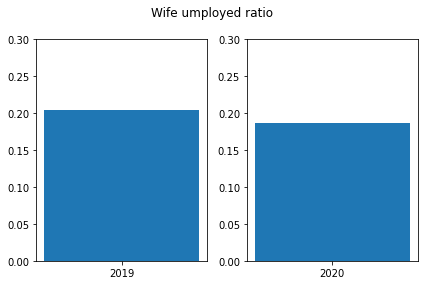

In [45]:
# 여성 코로나 이후 무직자 변화?
# 전체 초혼 여성 대비 무직자 비율은 코로나 이후 오히려 감소



no_job_before_covid = get_first_marriage(False, True)[get_first_marriage(False, True)['아내직업코드'] == 13]
no_job_after_covid = get_first_marriage(True, True)[get_first_marriage(True, True)['아내직업코드'] == 13]

plt.figure()

plt.suptitle("Wife umployed ratio")
plt.subplot(1, 2, 1)
plt.bar(x="2019", height=len(no_job_before_covid) / len(get_first_marriage(False, True)))
plt.ylim(0, 0.3)

plt.subplot(1, 2, 2)
plt.bar(x="2020", height=len(no_job_after_covid) / len(get_first_marriage(True, True)))
plt.ylim(0, 0.3)


plt.tight_layout()

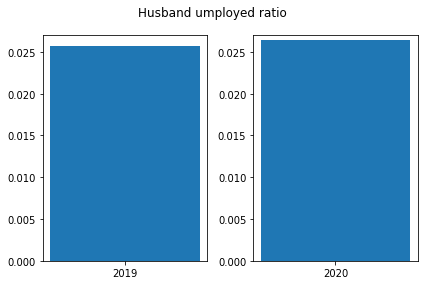

In [47]:
# 남성 코로나 이후 무직자 변화?
# 무직자 -> 근소하게 상승

no_job_before_covid = get_first_marriage(False, False)[get_first_marriage(False, False)['남편직업코드'] == 13]
no_job_after_covid = get_first_marriage(True, False)[get_first_marriage(True, False)['남편직업코드'] == 13]

plt.figure()

plt.suptitle("Husband umployed ratio")
plt.subplot(1, 2, 1)
plt.bar(x="2019", height=len(no_job_before_covid) / len(get_first_marriage(False, False)))
plt.ylim(0, 0.027)

plt.subplot(1, 2, 2)
plt.bar(x="2020", height=len(no_job_after_covid) / len(get_first_marriage(True, False)))
plt.ylim(0, 0.027)


plt.tight_layout()

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,남편직업코드,아내직업코드,남편교육코드,아내교육코드,남편결혼코드,아내결혼코드,남편연령,아내연령,남편국적구분코드,남편국적코드,아내국적구분코드,아내국적코드
0,2010,12,24,38,38,2010,10,3,3,5,5,1,1,32.679,30.490,1.0,NaN,1.0,NaN
1,2010,12,28,31,11,2010,12,5,13,3,4,1,1,28.030,28.723,1.0,NaN,1.0,NaN
2,2010,12,28,26,26,2010,9,3,13,5,5,1,1,29.400,28.556,1.0,NaN,1.0,NaN
3,2010,12,24,38,38,2010,10,3,13,5,5,1,1,29.671,26.150,1.0,NaN,1.0,NaN
4,2010,12,28,26,26,2010,9,7,2,5,5,1,1,28.991,28.526,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326602,2010,11,17,24,24,2010,10,3,3,5,5,1,1,34.728,30.904,1.0,NaN,1.0,NaN
326603,2010,8,5,11,11,2010,4,7,13,5,5,1,1,26.424,29.517,1.0,NaN,1.0,NaN
326604,2010,7,8,11,11,2010,7,3,3,5,5,1,1,30.361,29.597,1.0,NaN,1.0,NaN
326605,2010,7,8,11,11,2010,7,2,2,5,5,1,1,30.306,28.967,1.0,NaN,1.0,NaN
